<a href="https://colab.research.google.com/github/Alexjmsherman/nlp_practicum_cohort3_instructor/blob/master/lessons/lesson_5_word_embeddings/Word%20Embeddings%20Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Word Embeddings Solution

###### Author: Alex Sherman | alsherman@deloitte.com


##### Agenda
- Word2Vec
- cbow
- skig-gram
- fasttext

In [0]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models.fasttext import FastText
from smart_open import open, os
import logging
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image


In [0]:
CLEANED_TEXT_PATH = r'https://raw.githubusercontent.com/Alexjmsherman/nlp_practicum_cohort3_student/master/raw_data/cleaned_text/cleaned_text.txt?token=ABXRUPUOKF2MALZELKCLRBS5DE5PI'
EVALUATION_DATA = r'https://raw.githubusercontent.com/Alexjmsherman/nlp_practicum_cohort3_student/master/raw_data/evaluation/questions-words.txt?token=ABXRUPWJ2UXLI25RMLRULEC5DE5TI'
PUBMED_DATA = 'pubmed_data.txt'
SAVED_EMBEDDINGS_PATH = 'saved_embeddings_path.bin'
EVALUATION_PATH = r'evaluation.txt'
REPORTER_ZIP_PATH = r'RePORTER_PRJ_C_FY2017.zip'
DOC2VEC_SAVED_EMBEDDINGS_PATH = r'doc2vec_saved_embeddings_path.bin'

In [0]:
# save clean text to tmp
texts = pd.read_csv(CLEANED_TEXT_PATH, sep='\t')

with open(PUBMED_DATA, 'w') as f:
    for line in texts.values:
      f.write(line[0] + '\n')

In [0]:
# save evaluation data to tmp
texts = pd.read_csv(EVALUATION_DATA, header=None, sep='\t')

with open(EVALUATION_PATH, 'w') as f:
    for line in texts.values:
      f.write(line[0] + '\n')

In [6]:
!ls

evaluation.txt	pubmed_data.txt  sample_data


In [7]:
!head pubmed_data.txt

gluten and lymphocytes in coeliac_disease
this activity correlated best with the severity and duration of the disease rather than with gamma_globulin or total protein concentrations
evidence exists that they control some of the peripheral manifestations of the disease including nervousness palpitations tachycardia increased cardiac output and tremor but they do not appear to affect the underlying thyrotoxic process itself
the finding of additional substitute cf antigens for the hrvl agent may have implications in the against human disease
most of them were found in patients with digestive_tract disease essentially colonic cancer
latency in herpesvirus hominis its relationship to oncogenesis and recurrent disease
sixteen of patients treated with intent of cure are considered well with no evidence of disease
the remaining cases were considered failures all died except one living with disease
six of twelve cases per cent survived three years and of cases per cent survived for one year fre

### Word embedding
"Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with one dimension per word to a continuous vector space with much higher dimension.

Methods to generate this mapping include neural networks, dimensionality reduction on the word co-occurrence matrix, probabilistic models, and explicit representation in terms of the context in which words appear.

Word and phrase embeddings, when used as the underlying input representation, have been shown to boost the performance in NLP tasks such as syntactic parsing and sentiment analysis."

##### There are many techniques to create Word Embeddings. Some of the popular ones are:

- Binary Encoding
- TF Encoding
- TF-IDF Encoding
- Latent Semantic Analysis Encoding
- Topic Modeling
- Word2Vec Encoding

##### Why do we need Word Embeddings?
"Many machine learning algorithms and almost all Deep Learning Architectures are incapable of processing strings or plain text in their raw form. They require numbers as inputs to perform any sort of job, be it classification, regression etc. in broad terms. And with the huge amount of data that is present in the text format, it is imperative to extract knowledge out of it and build applications."

"So a natural language modelling technique like Word Embedding is used to map words or phrases from a vocabulary to a corresponding vector of real numbers. As well as being amenable to processing by ML algorithms, this vector representation has two important and advantageous properties:

- **Dimensionality Reduction** - it is a more efficient representation
- **Contextual Similarity** - it is a more expressive representation"

### Techniques (Count versus Predictive)
Count-based methods compute the statistics of how often some word co-occurs with its neighbor words in a large text corpus, and then map these count-statistics down to a small, dense vector for each word. Predictive models directly try to predict a word from its neighbors in terms of learned small, dense embedding vectors (considered parameters of the model)."

##### Word2Vec
Word2Vec is a more recent model that embeds words in a lower-dimensional vector space using a shallow neural network. The result is a set of word-vectors where vectors close together in vector space have similar meanings based on context, and word-vectors distant to each other have differing meanings. For example, strong and powerful would be close together and strong and Paris would be relatively far. There are two versions of this model based on skip-grams (SG) and continuous-bag-of-words (CBOW), both implemented by the gensim Word2Vec class.

Word2Vec uses a trick you may have seen elsewhere in machine learning. We’re going to train a simple neural network with a single hidden layer to perform a certain task, but then we’re not actually going to use that neural network for the task we trained it on! Instead, the goal is actually just to learn the weights of the hidden layer–we’ll see that these weights are actually the “word vectors” that we’re trying to learn.

The network is going to learn the statistics from the number of times each pairing shows up. So, for example, the network is probably going to get many more training samples of (“Soviet”, “Union”) than it is of (“Soviet”, “Sasquatch”). When the training is finished, if you give it the word “Soviet” as input, then it will output a much higher probability for “Union” or “Russia” than it will for “Sasquatch”.

##### Word2Vec - Skip-gram Model
The skip-gram word2vec model, for example, takes in pairs (word1, word2) generated by moving a window across text data, and trains a 1-hidden-layer neural network based on the synthetic task of given an input word, giving us a predicted probability distribution of nearby words to the input. A virtual one-hot encoding of words goes through a 'projection layer' to the hidden layer; these projection weights are later interpreted as the word embeddings. So if the hidden layer has 300 neurons, this network will give us 300-dimensional word embeddings.

##### Word2Vec - Continuous-bag-of-words Model
Continuous-bag-of-words Word2vec is very similar to the skip-gram model. It is also a 1-hidden-layer neural network. The synthetic training task now uses the average of multiple input context words, rather than a single word as in skip-gram, to predict the center word. Again, the projection weights that turn one-hot words into averageable vectors, of the same width as the hidden layer, are interpreted as the word embeddings.

SOURCE: 
- https://en.wikipedia.org/wiki/Word_embedding
- [An Intuitive Understanding of Word Embeddings: From Count Vectors to Word2Vec](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/)
- [What is word embedding in deep learning?](https://www.quora.com/What-is-word-embedding-in-deep-learning)
- [How to Develop Word Embeddings in Python with Gensim](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)
- [Advances in Pre-Training Distributed Word Representations](https://arxiv.org/pdf/1712.09405.pdf)
- [Vector Representations of Words](https://www.tensorflow.org/tutorials/word2vec)
- [Word2Vec Tutorial - The Skip-Gram Model](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)

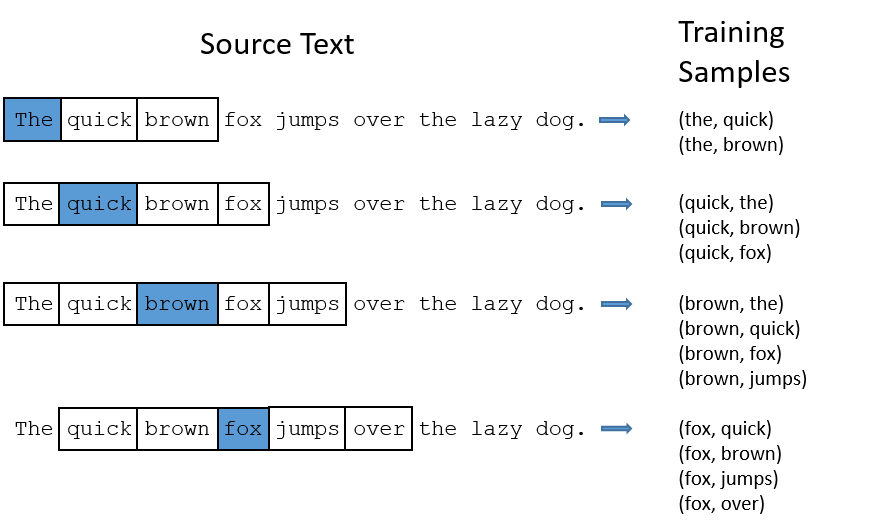

In [9]:
# Word2Vec Window
Image("https://s3.amazonaws.com/nlp.practicum/w2v_window.png", width=600)

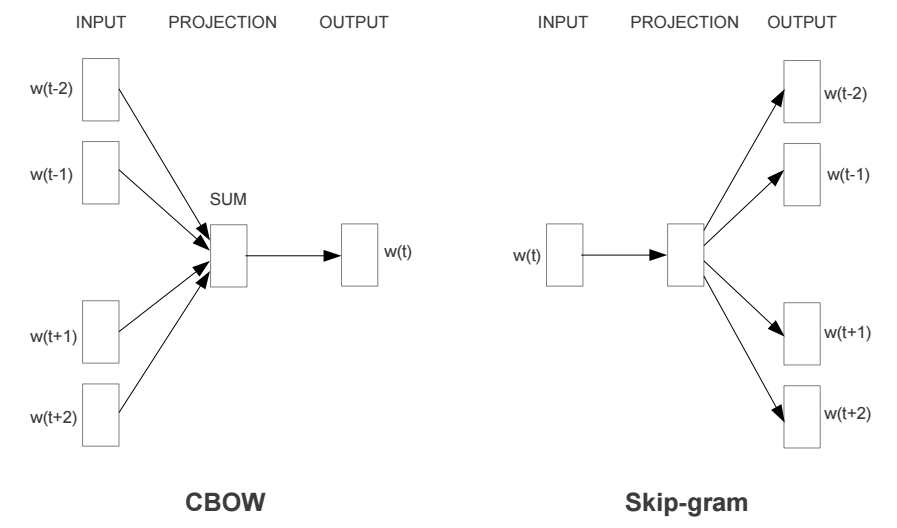

In [10]:
# Document and Word Vectors
Image("https://s3.amazonaws.com/nlp.practicum/word2vec_approaches.png", width=600)

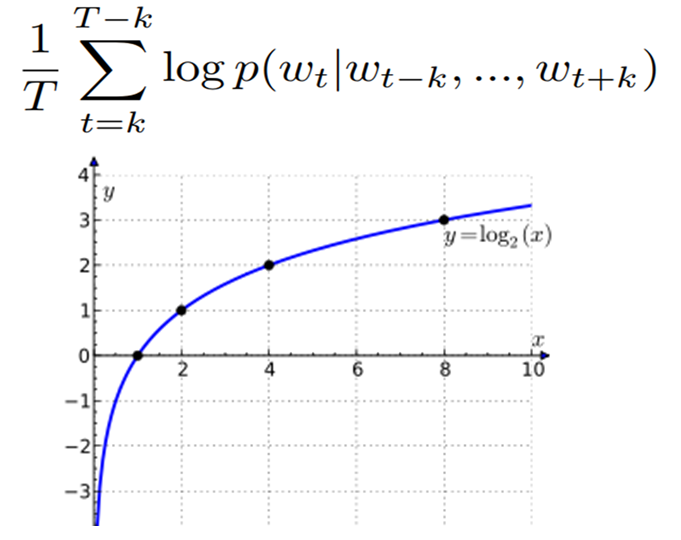

In [11]:
# Word2Vec Equations
Image("https://s3.amazonaws.com/nlp.practicum/w2v_equation.png", width=600)

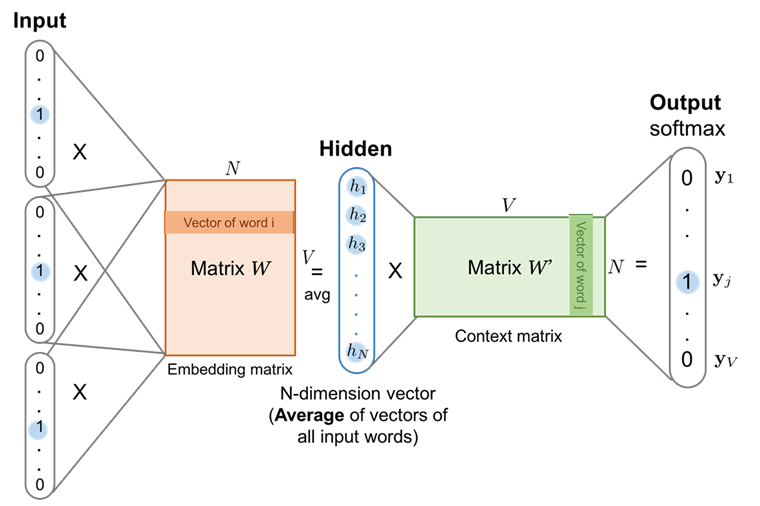

In [12]:
# Shallow Neural Net
Image("https://s3.amazonaws.com/nlp.practicum/shallow_net.png", width=600)

##### Input
When training this network on word pairs, the input is a one-hot vector representing the input word and the training output is also a one-hot vector representing the output word. But when you evaluate the trained network on an input word, the output vector will actually be a probability distribution (i.e., a bunch of floating point values, not a one-hot vector).

##### The Hidden Layer
For our example, we’re going to say that we’re learning word vectors with 300 features. So the hidden layer is going to be represented by a weight matrix with 10,000 rows (one for every word in our vocabulary) and 300 columns (one for every hidden neuron).

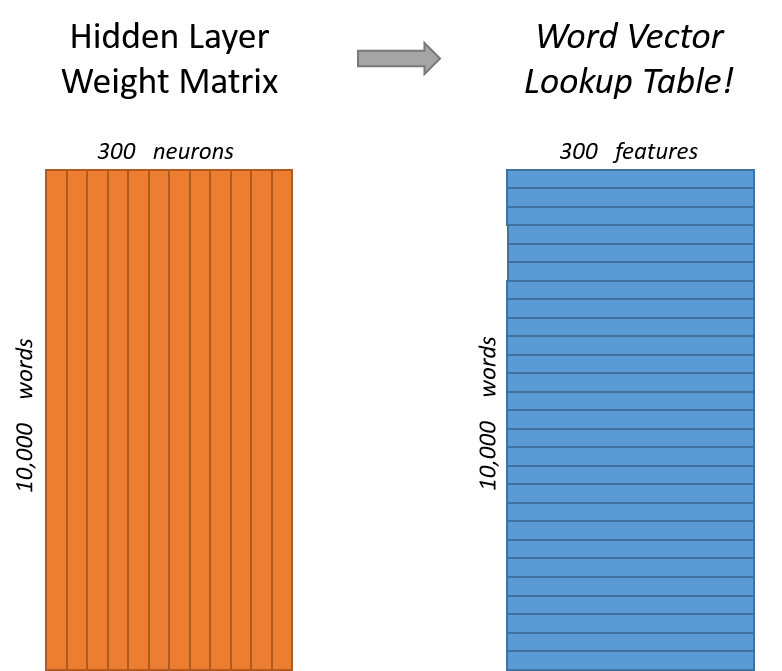

In [13]:
# Word2Vec Hidden Layer
Image("https://s3.amazonaws.com/nlp.practicum/word2vec_hidden_layer.png", width=400)

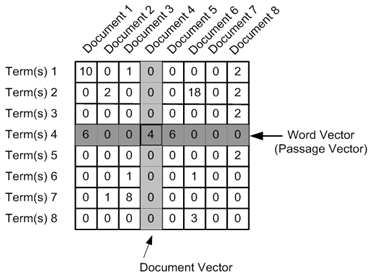

In [14]:
# Document and Word Vectors
Image("https://s3.amazonaws.com/nlp.practicum/word_vector.png", width=400)

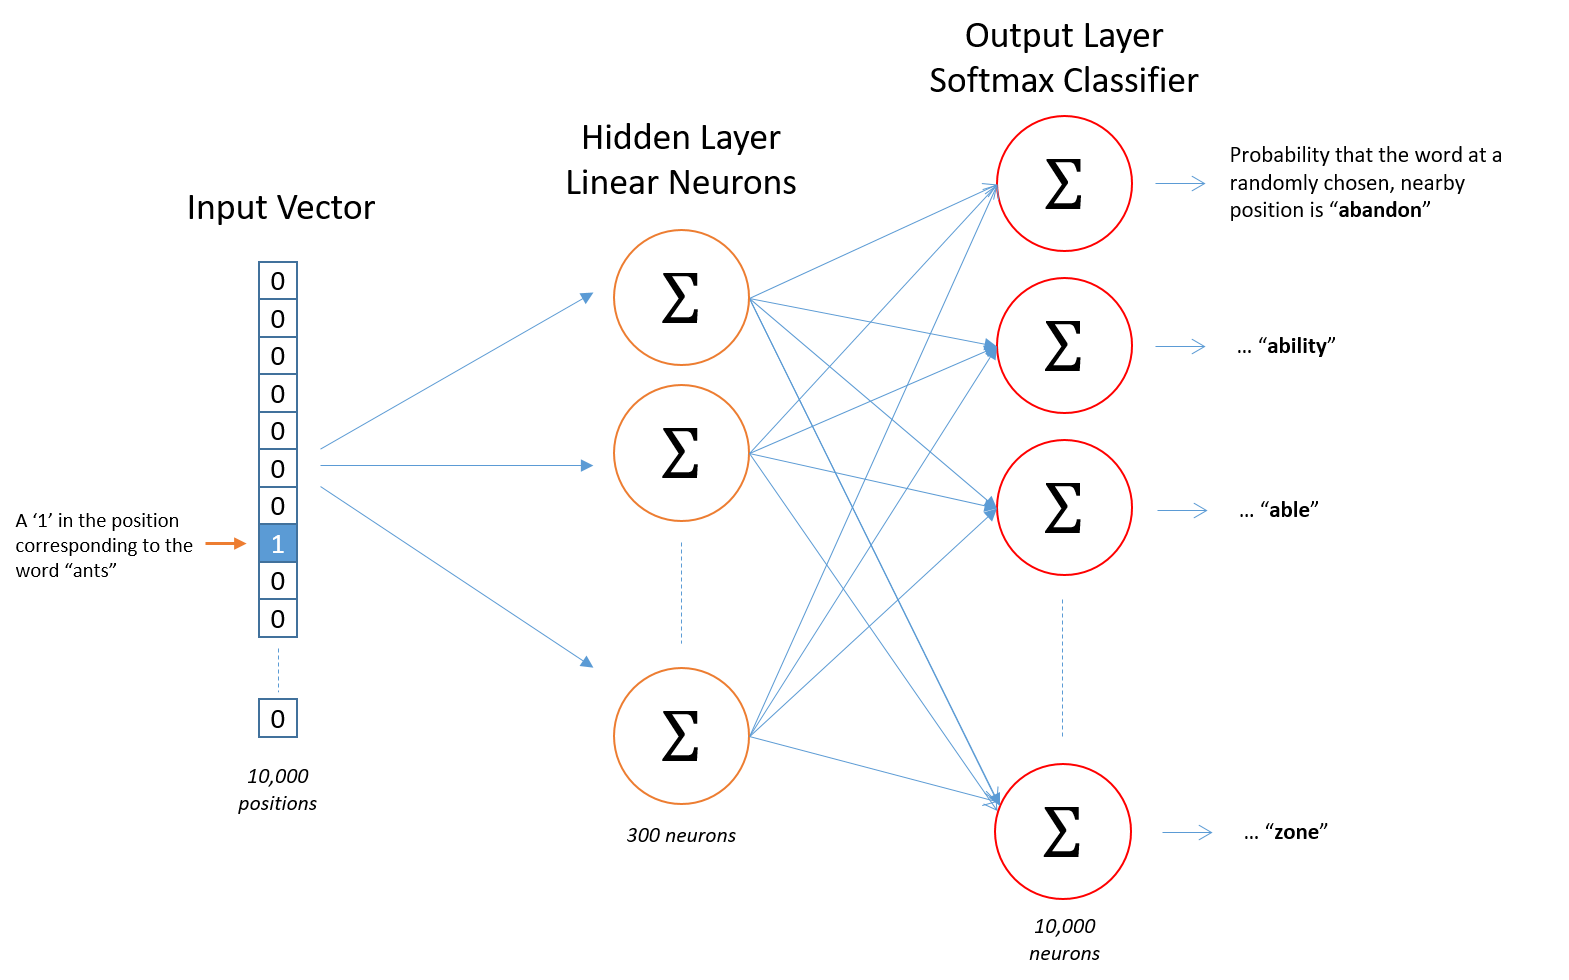

In [15]:
# Word2Vec Architecture
Image("https://s3.amazonaws.com/nlp.practicum/w2v_architecture.png", width=600)

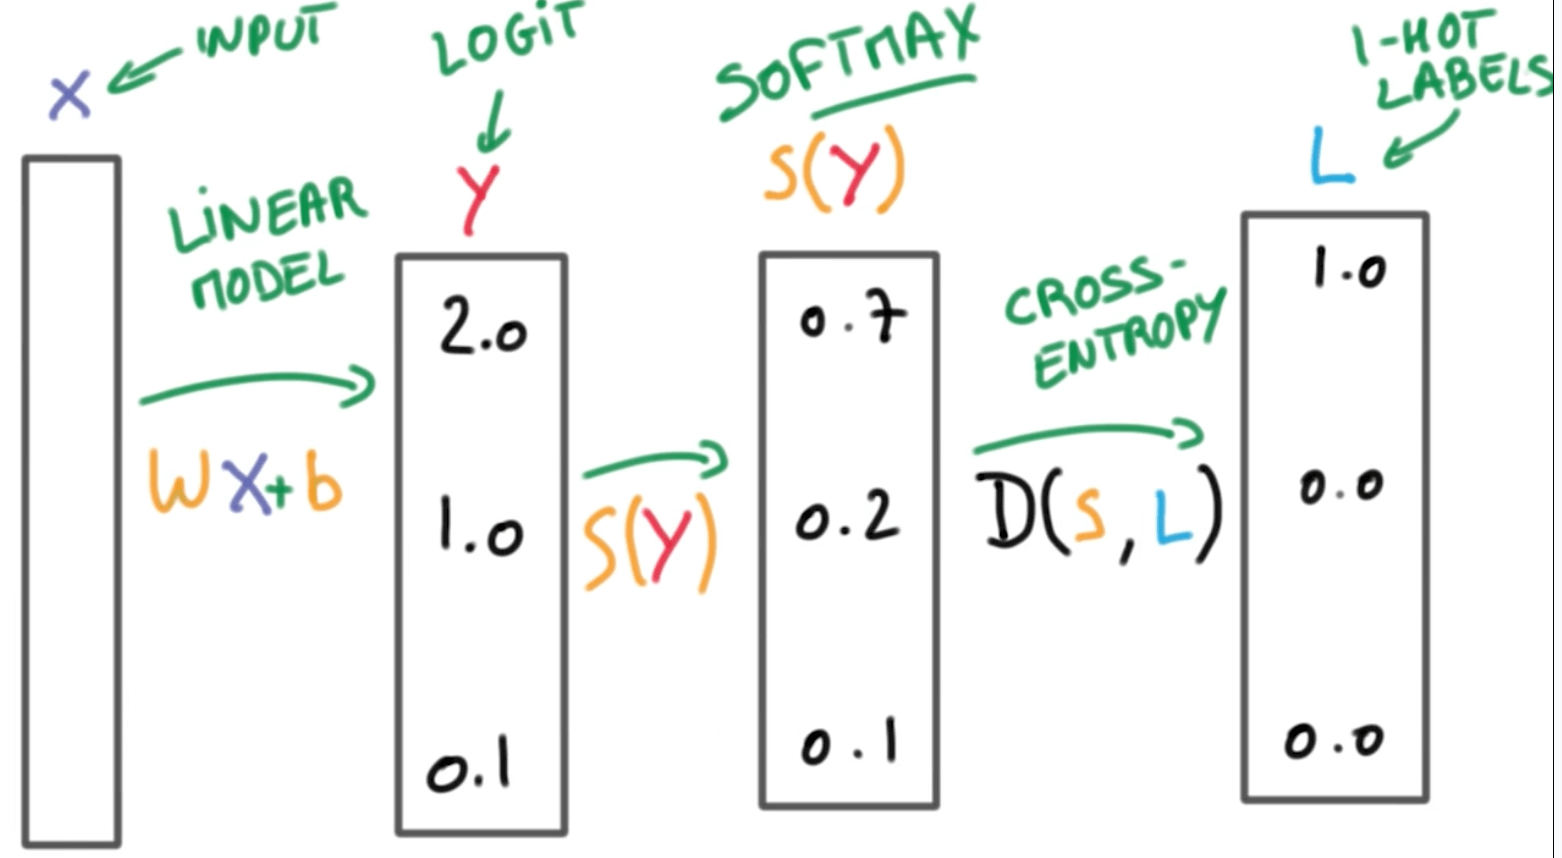

In [16]:
# Multinomial Logistic Regression
Image("https://s3.amazonaws.com/nlp.practicum/multinomial_logistic_regression.png", width=600)

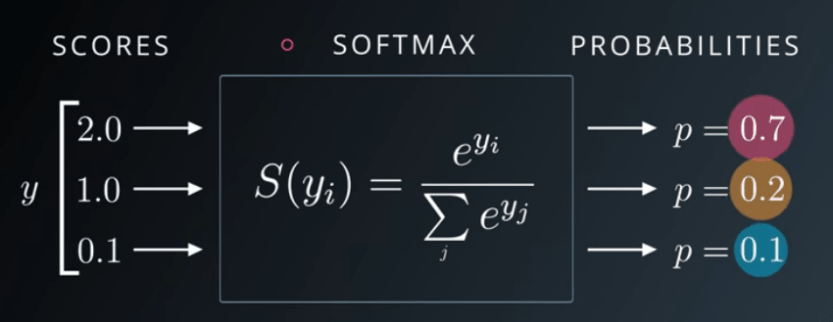

In [17]:
# Softmax
Image("https://s3.amazonaws.com/nlp.practicum/softmax.png", width=600)

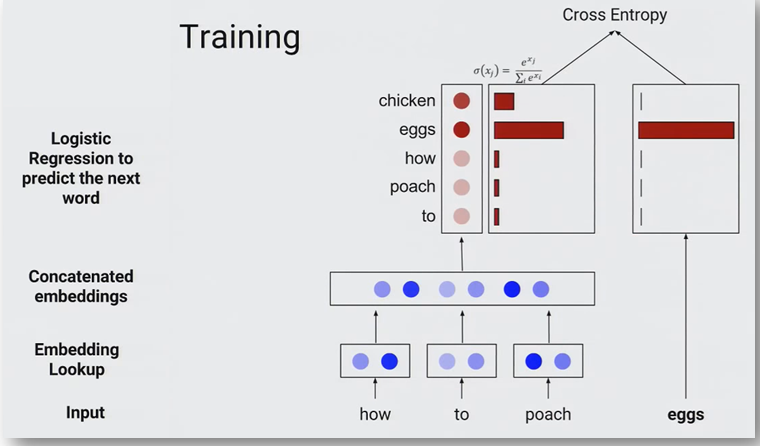

In [18]:
# Word2Vec Architecture
Image("https://s3.amazonaws.com/nlp.practicum/cross_entropy.png", width=600)

##### Cross Entropy

In a linear model, we have a scalar prediction, thus we can use an evaluation metric like MSE to evaluate the model.

When you’re using softmax, however, your output is a vector. One vector is the probability values from the output units. You can also express your data labels as a vector using what’s called one-hot encoding.

This just means that you have a vector the length of the number of classes, and the label element is marked with a 1 while the other labels are set to 0.

y=[0,0,0,0,1,0,0,0,0,0]

And our output prediction vector could be something like

y^=[0.047,0.048,0.061,0.07,0.330,0.062,0.001,0.213,0.013,0.150].

We want our error to be proportional to how far apart these vectors are. To calculate this distance, we’ll use the cross entropy. Then, our goal when training the network is to make our prediction vectors as close as possible to the label vectors by minimizing the cross entropy.

SOURCE: https://towardsdatascience.com/deep-learning-concepts-part-1-ea0b14b234c8

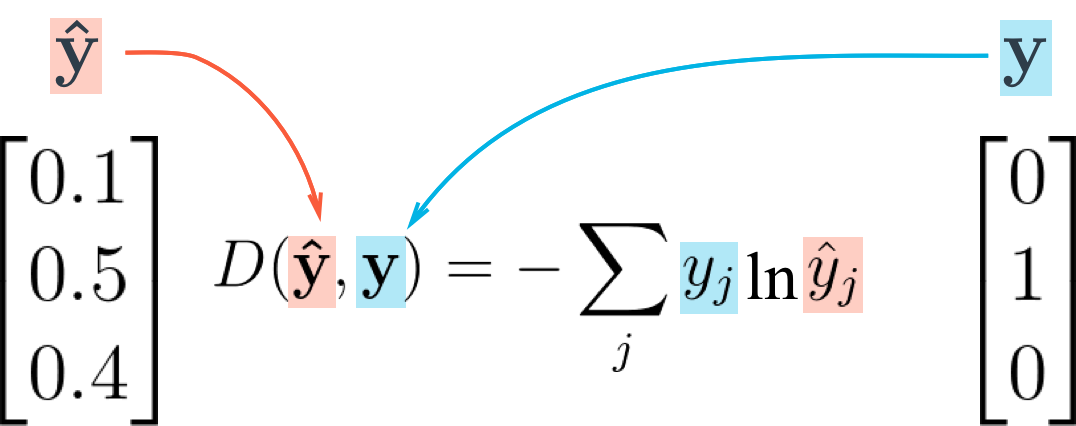

In [19]:
# Cross Entropy Example
Image("https://s3.amazonaws.com/nlp.practicum/cross_entropy_example.png", width=600)

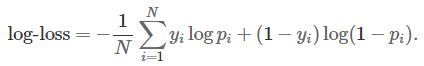

In [20]:
# Log Loss (i.e. binary cross entropy)
Image("https://s3.amazonaws.com/nlp.practicum/log_loss.png", width=600)

##### Distributed Representations of Words and Phrases and their Compositionality

There are three innovations in this second paper:

- Treating common word pairs or phrases as single “words” in their model.
- Subsampling frequent words to decrease the number of training examples.
- Modifying the optimization objective with a technique they called “Negative Sampling”, which causes each training sample to update only a small percentage of the model’s weights.

##### Phrases
Each pass only looks at combinations of 2 words, but you can run it multiple times to get longer phrases. So, the first pass will pick up the phrase “New_York”, and then running it again will pick up “New_York_City” as a combination of “New_York” and “City”.

##### Subsampling
Word2Vec implements a “subsampling” scheme to address this. For each word we encounter in our training text, there is a chance that we will effectively delete it from the text. The probability that we cut the word is related to the word’s frequency.

If we have a window size of 10, and we remove a specific instance of “the” from our text:

As we train on the remaining words, “the” will not appear in any of their context windows.
We’ll have 10 fewer training samples where “the” is the input word.

##### Negative Sampling 
Training a neural network means taking a training example and adjusting all of the neuron weights slightly so that it predicts that training sample more accurately. In other words, each training sample will tweak all of the weights in the neural network.

As we discussed above, the size of our word vocabulary means that our skip-gram neural network has a tremendous number of weights, all of which would be updated slightly by every one of our billions of training samples!

Negative sampling addresses this by having each training sample only modify a small percentage of the weights, rather than all of them. Here’s how it works.

When training the network on the word pair (“fox”, “quick”), recall that the “label” or “correct output” of the network is a one-hot vector. That is, for the output neuron corresponding to “quick” to output a 1, and for all of the other thousands of output neurons to output a 0.

With negative sampling, we are instead going to randomly select just a small number of “negative” words (let’s say 5) to update the weights for. (In this context, a “negative” word is one for which we want the network to output a 0 for). We will also still update the weights for our “positive” word (which is the word “quick” in our current example).


SOURCE:
- [Distributed Representations of Words and Phrases and their Compositionality:](https://arxiv.org/pdf/1310.4546.pdf)

### Train Embeddings

In [8]:
corpus = [
  'Text of the first document.',
  'Text of the second document made longer.',
  'Number three.',
  'This is number four.',
]

# we need to pass splitted sentences to the model
tokenized_sentences = [simple_preprocess(sentence) for sentence in corpus]
tokenized_sentences

[['text', 'of', 'the', 'first', 'document'],
 ['text', 'of', 'the', 'second', 'document', 'made', 'longer'],
 ['number', 'three'],
 ['this', 'is', 'number', 'four']]

In [9]:
# build a word2vec model
model = gensim.models.Word2Vec(tokenized_sentences, min_count=1)
print(model)

Word2Vec(vocab=13, size=100, alpha=0.025)


In [0]:
import logging

# add logging to view training info from gensim
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [11]:
# build a word2vec model with logging turned on
model = gensim.models.Word2Vec(tokenized_sentences, min_count=1)
print(model)

2019-06-25 03:33:51,336 : INFO : collecting all words and their counts
2019-06-25 03:33:51,338 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-25 03:33:51,339 : INFO : collected 13 word types from a corpus of 18 raw words and 4 sentences
2019-06-25 03:33:51,341 : INFO : Loading a fresh vocabulary
2019-06-25 03:33:51,343 : INFO : effective_min_count=1 retains 13 unique words (100% of original 13, drops 0)
2019-06-25 03:33:51,345 : INFO : effective_min_count=1 leaves 18 word corpus (100% of original 18, drops 0)
2019-06-25 03:33:51,348 : INFO : deleting the raw counts dictionary of 13 items
2019-06-25 03:33:51,351 : INFO : sample=0.001 downsamples 13 most-common words
2019-06-25 03:33:51,353 : INFO : downsampling leaves estimated 2 word corpus (12.5% of prior 18)
2019-06-25 03:33:51,354 : INFO : estimated required memory for 13 words and 100 dimensions: 16900 bytes
2019-06-25 03:33:51,358 : INFO : resetting layer weights
2019-06-25 03:33:51,360 : INFO :

Word2Vec(vocab=13, size=100, alpha=0.025)


### Streaming Big Data for Embeddings 

Source: https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/word2vec.ipynb

Let’s assume there are millions of documents in the corpus. Storing all of them in RAM won’t do. Instead, let’s assume the documents are stored in a file on disk, one document per line. Gensim only requires that a corpus be able to return one document vector at a time.

In [12]:
# text file of pubmed data (each line has one publication title and/or abstract)
PUBMED_DATA

'pubmed_data.txt'

##### Python fundamentals - you can only iterate through an open file once

In [13]:
# open a file (read mode)
f = open(PUBMED_DATA, 'r')

# iterate through the file and print the first line
for ind, line in enumerate(f):
    if ind < 5:
        print(line)

gluten and lymphocytes in coeliac_disease

this activity correlated best with the severity and duration of the disease rather than with gamma_globulin or total protein concentrations

evidence exists that they control some of the peripheral manifestations of the disease including nervousness palpitations tachycardia increased cardiac output and tremor but they do not appear to affect the underlying thyrotoxic process itself

the finding of additional substitute cf antigens for the hrvl agent may have implications in the against human disease

most of them were found in patients with digestive_tract disease essentially colonic cancer



In [14]:
# reopen the file
f = open(PUBMED_DATA, 'r')

for ind, line in enumerate(f):
    if ind < 3:
        print(line)
        f.__next__()  # call the next line on the iterator

gluten and lymphocytes in coeliac_disease

evidence exists that they control some of the peripheral manifestations of the disease including nervousness palpitations tachycardia increased cardiac output and tremor but they do not appear to affect the underlying thyrotoxic process itself

most of them were found in patients with digestive_tract disease essentially colonic cancer



In [0]:
# do not open the file again and attempt to print the lines
# this provides no output as you cannot iterate through a file more than once

for line in f:
    print(line)

##### Create a class with an __iter__ method to allow multiple passes through the text


##### gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
- Convert a document into a list of lowercase tokens, ignoring tokens that are too short or too long.

In [0]:
from smart_open import open, os

class MySentences(object):

    def __init__(self, fname):
        self.fname = fname
     
    # __iter__ allows multiple iterations of an open file
    def __iter__(self):
        for line in open(self.fname, 'r'):
            yield gensim.utils.simple_preprocess(line)  # similar to line.split()

In [0]:
# a memory-friendly iterator
sentences = MySentences(PUBMED_DATA)

In [18]:
# load one vector into memory at a time
for vector in sentences:
    print(vector)
    break

['gluten', 'and', 'lymphocytes', 'in', 'coeliac_disease']


### word2Vec Hyperparameters

- **size:** (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
- **window:** (default 5) The maximum distance between a target word and words around the target word.
- **min_count:** (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
- **sg:** (default 0) The training algorithm, either CBOW (0) or skip gram (1).

In [0]:
# build the same model, making the 2 steps explicit
# start with an empty model, no training occurs yet

new_model = gensim.models.Word2Vec(
      size=300
    , window=5
    , min_count=5
    , sg=1
)

In [20]:
%%time

# learn the vocabulary
new_model.build_vocab(sentences)

2019-06-25 03:46:32,501 : INFO : collecting all words and their counts
2019-06-25 03:46:32,503 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-25 03:46:32,829 : INFO : PROGRESS: at sentence #10000, processed 188573 words, keeping 13538 word types
2019-06-25 03:46:32,906 : INFO : collected 15212 word types from a corpus of 233427 raw words and 12446 sentences
2019-06-25 03:46:32,907 : INFO : Loading a fresh vocabulary
2019-06-25 03:46:33,013 : INFO : effective_min_count=5 retains 4629 unique words (30% of original 15212, drops 10583)
2019-06-25 03:46:33,014 : INFO : effective_min_count=5 leaves 215967 word corpus (92% of original 233427, drops 17460)
2019-06-25 03:46:33,036 : INFO : deleting the raw counts dictionary of 15212 items
2019-06-25 03:46:33,038 : INFO : sample=0.001 downsamples 29 most-common words
2019-06-25 03:46:33,040 : INFO : downsampling leaves estimated 149493 word corpus (69.2% of prior 215967)
2019-06-25 03:46:33,067 : INFO : estima

CPU times: user 598 ms, sys: 30.4 ms, total: 629 ms
Wall time: 637 ms


In [21]:
print('epochs: {}'.format(new_model.epochs))
print('corpus count: {}'.format(new_model.corpus_count))

epochs: 5
corpus count: 12446


In [22]:
%%time

# train the model
new_model.train(
      sentences
    , total_examples=new_model.corpus_count
    , epochs=new_model.epochs
)

2019-06-25 03:47:43,964 : INFO : training model with 3 workers on 4629 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
2019-06-25 03:47:45,035 : INFO : EPOCH 1 - PROGRESS: at 67.46% examples, 97717 words/s, in_qsize 2, out_qsize 0
2019-06-25 03:47:45,257 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-06-25 03:47:45,264 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-06-25 03:47:45,309 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-06-25 03:47:45,311 : INFO : EPOCH - 1 : training on 233427 raw words (149539 effective words) took 1.3s, 112355 effective words/s
2019-06-25 03:47:46,354 : INFO : EPOCH 2 - PROGRESS: at 63.42% examples, 93225 words/s, in_qsize 5, out_qsize 0
2019-06-25 03:47:46,666 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-06-25 03:47:46,692 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-06-25 03:47:46,696 : INFO : work

CPU times: user 13.5 s, sys: 101 ms, total: 13.6 s
Wall time: 7.22 s


(747399, 1167135)

### Save Embeddings

In [23]:
# save the model
new_model.save(SAVED_EMBEDDINGS_PATH)

2019-06-25 03:48:14,935 : INFO : saving Word2Vec object under saved_embeddings_path.bin, separately None
2019-06-25 03:48:14,938 : INFO : not storing attribute vectors_norm
2019-06-25 03:48:14,940 : INFO : not storing attribute cum_table
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-06-25 03:48:15,127 : INFO : saved saved_embeddings_path.bin


In [24]:
# open the model
new_model = gensim.models.Word2Vec.load(SAVED_EMBEDDINGS_PATH)

2019-06-25 03:48:29,016 : INFO : loading Word2Vec object from saved_embeddings_path.bin
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-06-25 03:48:29,124 : INFO : loading wv recursively from saved_embeddings_path.bin.wv.* with mmap=None
2019-06-25 03:48:29,125 : INFO : setting ignored attribute vectors_norm to None
2019-06-25 03:48:29,126 : INFO : loading vocabulary recursively from saved_embeddings_path.bin.vocabulary.* with mmap=None
2019-06-25 03:48:29,134 : INFO : loading trainables recursively from saved_embeddings_path.bin.trainables.* with mmap=None
2019-06-25 03:48:29,136 : INFO : setting ignored attribute cum_table to None
2019-06-25 03:48:29,137 : INFO : loaded saved_em

### Online Training

In [25]:
more_sentences = [['Advanced', 'users', 'can', 'load', 'a', 'model', 'and', 'continue', 'training']]
new_model.build_vocab(more_sentences, update=True)
new_model.train(more_sentences, total_examples=len(more_sentences), epochs=model.epochs)

2019-06-25 03:49:39,898 : INFO : collecting all words and their counts
2019-06-25 03:49:39,900 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-25 03:49:39,904 : INFO : collected 9 word types from a corpus of 9 raw words and 1 sentences
2019-06-25 03:49:39,907 : INFO : Updating model with new vocabulary
2019-06-25 03:49:39,909 : INFO : New added 0 unique words (0% of original 9) and increased the count of 0 pre-existing words (0% of original 9)
2019-06-25 03:49:39,910 : INFO : deleting the raw counts dictionary of 9 items
2019-06-25 03:49:39,913 : INFO : sample=0.001 downsamples 0 most-common words
2019-06-25 03:49:39,914 : INFO : downsampling leaves estimated 0 word corpus (0.0% of prior 0)
2019-06-25 03:49:39,933 : INFO : estimated required memory for 4629 words and 300 dimensions: 13424100 bytes
2019-06-25 03:49:39,935 : INFO : updating layer weights
2019-06-25 03:49:39,944 : WARNING : Effective 'alpha' higher than previous training cycles
2019-06-2

(15, 45)

### 2Vec File-based Training (improve training performance >3x)

SOURCE: https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/Any2Vec_Filebased.ipynb

### Explore Embeddings

In [26]:
print(list(new_model.wv.vocab)[0:100])

['gluten', 'and', 'lymphocytes', 'in', 'coeliac_disease', 'this', 'activity', 'correlated', 'best', 'with', 'the', 'severity', 'duration', 'of', 'disease', 'rather', 'than', 'gamma_globulin', 'or', 'total', 'protein', 'concentrations', 'evidence', 'exists', 'that', 'they', 'control', 'some', 'peripheral', 'manifestations', 'including', 'tachycardia', 'increased', 'cardiac', 'tremor', 'but', 'do', 'not', 'appear', 'to', 'affect', 'underlying', 'thyrotoxic', 'process', 'itself', 'finding', 'additional', 'cf', 'antigens', 'for', 'agent', 'may', 'have', 'implications', 'against', 'human', 'most', 'them', 'were', 'found', 'patients', 'digestive_tract', 'essentially', 'colonic', 'cancer', 'latency', 'herpesvirus', 'its', 'relationship', 'recurrent', 'sixteen', 'treated', 'cure', 'are', 'considered', 'well', 'no', 'remaining', 'cases', 'failures', 'all', 'died', 'except', 'one', 'living', 'six', 'twelve', 'per', 'cent', 'survived', 'three', 'years', 'year', 'free', 'average', 'values', 'iga',

In [27]:
# create a word vector from a trained work
print(new_model.wv['disease'])

[-7.21455067e-02  2.41131783e-01 -6.22811392e-02  2.05705956e-01
  7.55221490e-03 -1.14175722e-01  1.61067918e-01  1.31947190e-01
  7.05041960e-02  1.15212545e-01  2.43454948e-01  3.27013955e-02
  2.40801409e-01 -1.10818795e-03 -1.30477503e-01  8.88377428e-02
 -1.87811211e-01 -1.10673346e-01  2.71568567e-01 -3.22411433e-02
 -7.94161297e-03  1.52872261e-02  1.13047827e-02  2.06764475e-01
  3.13175648e-01 -7.46189663e-03  2.25493312e-01 -6.76403716e-02
  6.35419488e-02  8.70900601e-02 -1.19148165e-01 -5.68975136e-02
 -1.10935913e-02 -7.96630457e-02 -1.81140915e-01 -2.61457950e-01
 -2.05690384e-01  1.27174169e-01  8.28663558e-02  6.39733970e-02
  8.26705620e-02  2.52235588e-02  5.57538569e-02 -2.17941433e-01
 -4.09511998e-02 -4.23950031e-02 -2.34809667e-02  1.44766316e-01
  2.19334036e-01  2.13030577e-01 -1.61171645e-01  2.20715087e-02
  2.00600281e-01 -7.91067258e-03  5.12623368e-03  1.35183483e-01
  2.43409321e-01 -1.48860410e-01 -8.93703550e-02 -7.65361935e-02
  8.54639057e-03 -1.13945

In [28]:
new_model.most_similar(positive=['disease'], topn=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-06-25 03:50:20,377 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('acute', 0.6432129144668579),
 ('crohn_disease', 0.6430239677429199),
 ('frequency', 0.6391650438308716),
 ('liver_disease', 0.6359442472457886),
 ('cirrhosis', 0.6356167793273926),
 ('hypertension', 0.6355558633804321),
 ('under', 0.6340047121047974),
 ('outcome', 0.6267731785774231),
 ('illness', 0.6263744831085205),
 ('levodopa', 0.6261484622955322)]

In [29]:
from itertools import combinations
compare_words = ['syndrome', 'disease', 'illness']

for t1, t2 in combinations(compare_words, 2):
    print('t1: {} | t2: {} | simiarity_score: {}'.format(t1, t2, new_model.wv.similarity(t1,t2)))

t1: syndrome | t2: disease | simiarity_score: 0.566709041595459
t1: syndrome | t2: illness | simiarity_score: 0.8250125050544739
t1: disease | t2: illness | simiarity_score: 0.6263744831085205


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### Evaluating Embedding

https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/word2vec.ipynb

Evaluating
Word2Vec training is an unsupervised task, there’s no good way to objectively evaluate the result. Evaluation depends on your end application.

Google has released their testing set of about 20,000 syntactic and semantic test examples, following the “A is to B as C is to D” task. It is provided in the 'datasets' folder.

For example a syntactic analogy of comparative type is bad:worse;good:?. There are total of 9 types of syntactic comparisons in the dataset like plural nouns and nouns of opposite meaning.

The semantic questions contain five types of semantic analogies, such as capital cities (Paris:France;Tokyo:?) or family members (brother:sister;dad:?).

Gensim supports the same evaluation set, in exactly the same format:

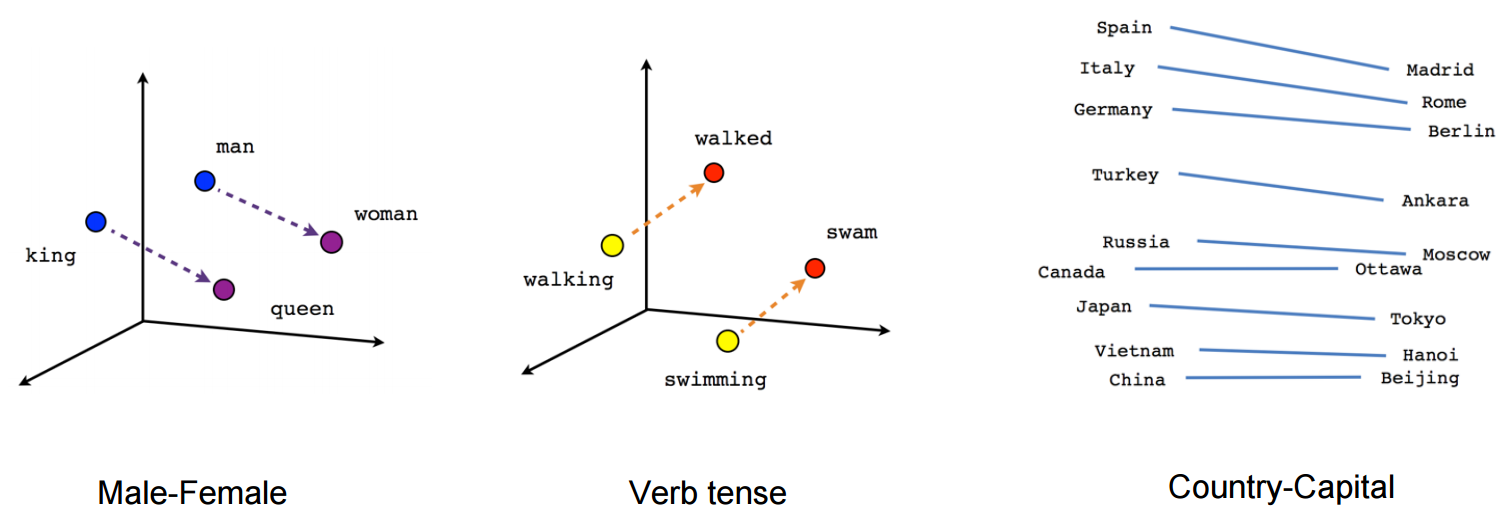

In [30]:
# Document and Word Vectors
Image("https://s3.amazonaws.com/nlp.practicum/man_to_king_w2v.png", width=800)

In [31]:
new_model.wv.accuracy(EVALUATION_PATH)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
2019-06-25 03:50:42,778 : INFO : family: 2.4% (1/42)
2019-06-25 03:50:42,887 : INFO : gram1-adjective-to-adverb: 0.0% (0/90

[{'correct': [], 'incorrect': [], 'section': 'capital-common-countries'},
 {'correct': [], 'incorrect': [], 'section': 'capital-world'},
 {'correct': [], 'incorrect': [], 'section': 'currency'},
 {'correct': [], 'incorrect': [], 'section': 'city-in-state'},
 {'correct': [('HE', 'SHE', 'BOY', 'GIRL')],
  'incorrect': [('BOY', 'GIRL', 'BROTHER', 'SISTER'),
   ('BOY', 'GIRL', 'BROTHERS', 'SISTERS'),
   ('BOY', 'GIRL', 'FATHER', 'MOTHER'),
   ('BOY', 'GIRL', 'HE', 'SHE'),
   ('BOY', 'GIRL', 'HIS', 'HER'),
   ('BOY', 'GIRL', 'MAN', 'WOMAN'),
   ('BROTHER', 'SISTER', 'BROTHERS', 'SISTERS'),
   ('BROTHER', 'SISTER', 'FATHER', 'MOTHER'),
   ('BROTHER', 'SISTER', 'HE', 'SHE'),
   ('BROTHER', 'SISTER', 'HIS', 'HER'),
   ('BROTHER', 'SISTER', 'MAN', 'WOMAN'),
   ('BROTHER', 'SISTER', 'BOY', 'GIRL'),
   ('BROTHERS', 'SISTERS', 'FATHER', 'MOTHER'),
   ('BROTHERS', 'SISTERS', 'HE', 'SHE'),
   ('BROTHERS', 'SISTERS', 'HIS', 'HER'),
   ('BROTHERS', 'SISTERS', 'MAN', 'WOMAN'),
   ('BROTHERS', 'SISTERS'

### FastText

Source: https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/FastText_Tutorial.ipynb

##### Subwords
The main principle behind fastText is that the morphological structure of a word carries important information about the meaning of the word, which is not taken into account by traditional word embeddings, which train a unique word embedding for every individual word. This is especially significant for morphologically rich languages (German, Turkish) in which a single word can have a large number of morphological forms, each of which might occur rarely, thus making it hard to train good word embeddings.

FastText attempts to solve this by treating each word as the aggregation of its subwords. For the sake of simplicity and language-independence, subwords are taken to be the character ngrams of the word. The vector for a word is simply taken to be the sum of all vectors of its component char-ngrams.

##### OOV
FastText can be used to obtain vectors for out-of-vocabulary (OOV) words, by summing up vectors for its component char-ngrams, provided at least one of the char-ngrams was present in the training data.

##### fastText = better syntactic; Word2Vec = better semantic
According to a detailed comparison of Word2Vec and FastText in this notebook, fastText does significantly better on syntactic tasks as compared to the original Word2Vec, especially when the size of the training corpus is small. Word2Vec slightly outperforms FastText on semantic tasks though. The differences grow smaller as the size of training corpus increases. 

##### fastText = longer training time
Training time for fastText is significantly higher than the Gensim version of Word2Vec (15min 42s vs 6min 42s on text8, 17 mil tokens, 5 epochs, and a vector size of 100).

SOURCE: [Enriching Word Vectors with Subword Information](https://arxiv.org/pdf/1607.04606.pdf)

In [0]:
from gensim.models.fasttext import FastText

In [33]:
%%time

fasttext = FastText(sentences)
fasttext

2019-06-25 03:56:07,824 : INFO : collecting all words and their counts
2019-06-25 03:56:07,827 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-25 03:56:08,152 : INFO : PROGRESS: at sentence #10000, processed 188573 words, keeping 13538 word types
2019-06-25 03:56:08,232 : INFO : collected 15212 word types from a corpus of 233427 raw words and 12446 sentences
2019-06-25 03:56:08,234 : INFO : Loading a fresh vocabulary
2019-06-25 03:56:08,259 : INFO : effective_min_count=5 retains 4629 unique words (30% of original 15212, drops 10583)
2019-06-25 03:56:08,260 : INFO : effective_min_count=5 leaves 215967 word corpus (92% of original 233427, drops 17460)
2019-06-25 03:56:08,284 : INFO : deleting the raw counts dictionary of 15212 items
2019-06-25 03:56:08,286 : INFO : sample=0.001 downsamples 29 most-common words
2019-06-25 03:56:08,287 : INFO : downsampling leaves estimated 149493 word corpus (69.2% of prior 215967)
2019-06-25 03:56:08,388 : INFO : estima

CPU times: user 15.5 s, sys: 718 ms, total: 16.2 s
Wall time: 9.64 s


In [34]:
fasttext.wv.accuracy(EVALUATION_PATH)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-06-25 03:56:24,963 : INFO : precomputing L2-norms of word weight vectors
2019-06-25 03:56:24,971 : INFO : precomputing L2-norms of ngram weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if 

[{'correct': [], 'incorrect': [], 'section': 'capital-common-countries'},
 {'correct': [], 'incorrect': [], 'section': 'capital-world'},
 {'correct': [], 'incorrect': [], 'section': 'currency'},
 {'correct': [], 'incorrect': [], 'section': 'city-in-state'},
 {'correct': [],
  'incorrect': [('BOY', 'GIRL', 'BROTHER', 'SISTER'),
   ('BOY', 'GIRL', 'BROTHERS', 'SISTERS'),
   ('BOY', 'GIRL', 'FATHER', 'MOTHER'),
   ('BOY', 'GIRL', 'HE', 'SHE'),
   ('BOY', 'GIRL', 'HIS', 'HER'),
   ('BOY', 'GIRL', 'MAN', 'WOMAN'),
   ('BROTHER', 'SISTER', 'BROTHERS', 'SISTERS'),
   ('BROTHER', 'SISTER', 'FATHER', 'MOTHER'),
   ('BROTHER', 'SISTER', 'HE', 'SHE'),
   ('BROTHER', 'SISTER', 'HIS', 'HER'),
   ('BROTHER', 'SISTER', 'MAN', 'WOMAN'),
   ('BROTHER', 'SISTER', 'BOY', 'GIRL'),
   ('BROTHERS', 'SISTERS', 'FATHER', 'MOTHER'),
   ('BROTHERS', 'SISTERS', 'HE', 'SHE'),
   ('BROTHERS', 'SISTERS', 'HIS', 'HER'),
   ('BROTHERS', 'SISTERS', 'MAN', 'WOMAN'),
   ('BROTHERS', 'SISTERS', 'BOY', 'GIRL'),
   ('BROTH

In [35]:





















fasttext.most_similar(positive=['disease'], topn=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('disease_fmd', 0.993850588798523),
 ('diseases', 0.9936189651489258),
 ('fabry_disease', 0.9771741032600403),
 ('crohn_disease', 0.9763113856315613),
 ('bowen_disease', 0.9743666648864746),
 ('paget_disease', 0.9738597869873047),
 ('basedow_disease', 0.9736207127571106),
 ('darier_disease', 0.9712367653846741),
 ('liver_disease', 0.9701169729232788),
 ('hydatid_disease', 0.969859778881073)]

### Doc2Vec

Doc2vec (aka paragraph2vec, aka sentence embeddings) modifies the word2vec algorithm to unsupervised learning of continuous representations for larger blocks of text, such as sentences, paragraphs or entire documents.

##### Paragraph Vector - Distributed Memory (PV-DM)
This is the Paragraph Vector model analogous to Continuous-bag-of-words Word2vec. The paragraph vectors are obtained by training a neural network on the fake task of inferring a center word based on context words and a context paragraph. A paragraph is a context for all words in the paragraph, and a word in a paragraph can have that paragraph as a context.

##### Paragraph Vector - Distributed Bag of Words (PV-DBOW)
This is the Paragraph Vector model analogous to Skip-gram Word2vec. The paragraph vectors are obtained by training a neural network on the fake task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

Paragraph Vector, aka gensim Doc2Vec
The straightforward approach of averaging each of a text's words' word-vectors creates a quick and crude document-vector that can often be useful. However, Le and Mikolov in 2014 introduced the Paragraph Vector, which usually outperforms such simple-averaging.

SOURCE: 
- [Doc2vec tutorial](https://rare-technologies.com/doc2vec-tutorial/)
- [Distributed Representations of Sentences and Documents:](https://cs.stanford.edu/~quocle/paragraph_vector.pdf)
- [Representations for Language: From Word Embeddings to Sentence Meanings
](https://nlp.stanford.edu/manning/talks/Simons-Institute-Manning-2017.pdf)
- [A gentle introduction to Doc2Vec](https://medium.com/scaleabout/a-gentle-introduction-to-doc2vec-db3e8c0cce5e)
- [Gensim Doc2vec Tutorial on the IMDB Sentiment Dataset](https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/doc2vec-IMDB.ipynb)

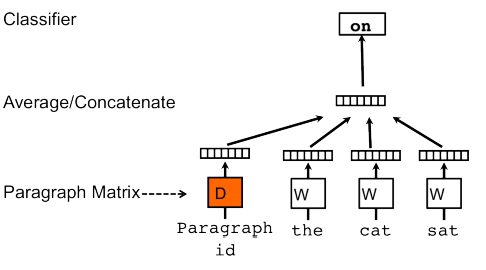

In [70]:
# Paragraph Vector - Distributed Memory (PV_DM) Model 
Image("https://s3.amazonaws.com/nlp.practicum/pv_dm.png", width=600)

In [71]:
# download NIH RePORTER data
!wget http://www.nber.org/nih/2017/RePORTER_PRJ_C_FY2017.zip

--2019-06-24 04:34:27--  http://www.nber.org/nih/2017/RePORTER_PRJ_C_FY2017.zip
Resolving www.nber.org (www.nber.org)... 199.233.228.243
Connecting to www.nber.org (www.nber.org)|199.233.228.243|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55057509 (53M) [application/zip]
Saving to: ‘RePORTER_PRJ_C_FY2017.zip’

RePORTER_PRJ_C_FY20 100%[===================>]  52.51M  50.9MB/s    in 1.0s    

2019-06-24 04:34:29 (50.9 MB/s) - ‘RePORTER_PRJ_C_FY2017.zip’ saved [55057509/55057509]



In [72]:
# Note pandas can read data from a zip file without unzipping it
REPORTER_ZIP_PATH

'RePORTER_PRJ_C_FY2017.zip'

In [73]:
cols = ['PROJECT_TITLE','IC_NAME']
reporter = pd.read_csv(REPORTER_ZIP_PATH, encoding='latin', usecols=cols)
reporter.dropna(inplace=True)
reporter.head()

,IC_NAME,PROJECT_TITLE
0,"NATIONAL HEART, LUNG, AND BLOOD INSTITUTE",Study of Novel Approaches to Weight Gain Preve...
1,NATIONAL INSTITUTE ON AGING,ASPirin in Reducing Events in the Elderly
2,NATIONAL INSTITUTE OF DIABETES AND DIGESTIVE A...,Improving Prediction of Medical Responsiveness...
3,NATIONAL CANCER INSTITUTE,Multifunctional immunoPET tracers for pancreat...
4,National Center for Complementary & Integrativ...,Molecular mechanism of omega-3 response


In [74]:
reporter.IC_NAME.value_counts()[0:10]

NATIONAL CANCER INSTITUTE                                                        11300
NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS DISEASES                             7714
NATIONAL INSTITUTE OF GENERAL MEDICAL SCIENCES                                    7543
NATIONAL HEART, LUNG, AND BLOOD INSTITUTE                                         6429
NATIONAL INSTITUTE OF DIABETES AND DIGESTIVE AND KIDNEY DISEASES                  5018
NATIONAL INSTITUTE OF NEUROLOGICAL DISORDERS AND STROKE                           4553
NATIONAL INSTITUTE ON AGING                                                       3901
NATIONAL INSTITUTE OF MENTAL HEALTH                                               3479
EUNICE KENNEDY SHRIVER NATIONAL INSTITUTE OF CHILD HEALTH & HUMAN DEVELOPMENT     3353
NATIONAL INSTITUTE ON DRUG ABUSE                                                  2556
Name: IC_NAME, dtype: int64

In [0]:
# filter the reporter dataset to the top institutes
frequent_institutes = reporter.IC_NAME.value_counts().index[0:3]
reporter = reporter[reporter.IC_NAME.isin(frequent_institutes)]

In [0]:
from smart_open import smart_open, os

class MyDocument(object):
    def __init__(self, df):
        self.df = df

    def __iter__(self):
        for ind, row in self.df.iterrows():
            yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(row['PROJECT_TITLE']), row['IC_NAME'])

train_corpus = MyDocument(reporter)

In [77]:
for title, institute in train_corpus:
    print(institute)
    print(title)
    break

NATIONAL CANCER INSTITUTE
['multifunctional', 'immunopet', 'tracers', 'for', 'pancreatic', 'and', 'prostate', 'cancer']


In [78]:
from gensim.models import doc2vec

d2v = doc2vec.Doc2Vec(
      vector_size=400
    , epochs=20
    , dm=0
)

print(d2v)

Doc2Vec(dbow,d400,n5,mc5,s0.001,t3)


In [79]:
d2v.build_vocab(train_corpus)

2019-06-24 04:34:55,269 : INFO : collecting all words and their counts
2019-06-24 04:34:55,275 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2019-06-24 04:34:58,179 : INFO : PROGRESS: at example #10000, processed 79288 words (27332/s), 8861 word types, 17 tags
2019-06-24 04:35:01,051 : INFO : PROGRESS: at example #20000, processed 158744 words (27672/s), 12557 word types, 17 tags
2019-06-24 04:35:02,936 : INFO : collected 14400 word types and 17 unique tags from a corpus of 26557 examples and 210800 words
2019-06-24 04:35:02,937 : INFO : Loading a fresh vocabulary
2019-06-24 04:35:02,954 : INFO : effective_min_count=5 retains 3814 unique words (26% of original 14400, drops 10586)
2019-06-24 04:35:02,955 : INFO : effective_min_count=5 leaves 193914 word corpus (91% of original 210800, drops 16886)
2019-06-24 04:35:02,975 : INFO : deleting the raw counts dictionary of 14400 items
2019-06-24 04:35:02,977 : INFO : sample=0.001 downsamples 42 most-common wo

In [80]:
%%time

d2v.train(
    train_corpus,
    total_examples=d2v.corpus_count,
    epochs=d2v.epochs
)

2019-06-24 04:35:03,063 : INFO : training model with 3 workers on 3814 vocabulary and 400 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
2019-06-24 04:35:06,733 : INFO : EPOCH 1 - PROGRESS: at 4.84% examples, 15580 words/s, in_qsize 5, out_qsize 0
2019-06-24 04:35:08,816 : INFO : EPOCH 1 - PROGRESS: at 18.89% examples, 39035 words/s, in_qsize 5, out_qsize 0
2019-06-24 04:35:10,967 : INFO : EPOCH 1 - PROGRESS: at 33.16% examples, 49908 words/s, in_qsize 6, out_qsize 0
2019-06-24 04:35:13,219 : INFO : EPOCH 1 - PROGRESS: at 47.46% examples, 55473 words/s, in_qsize 5, out_qsize 0
2019-06-24 04:35:15,163 : INFO : EPOCH 1 - PROGRESS: at 61.73% examples, 60560 words/s, in_qsize 5, out_qsize 0
2019-06-24 04:35:16,690 : INFO : EPOCH 1 - PROGRESS: at 75.86% examples, 66109 words/s, in_qsize 5, out_qsize 0
2019-06-24 04:35:18,165 : INFO : EPOCH 1 - PROGRESS: at 90.02% examples, 70774 words/s, in_qsize 3, out_qsize 0
2019-06-24 04:35:18,308 : INFO : worker thread finished; awaiting fi

CPU times: user 8min 37s, sys: 5.27 s, total: 8min 43s
Wall time: 5min 10s


In [0]:
# OPTIONAL - update the learning rate at each iteration

# set as true to run
if 1 == 0:
    d2v = doc2vec.Doc2Vec(alpha=0.025, min_alpha=0.025)
    d2v.build_vocab(train_corpus)

    for epoch in range(2):
        d2v.train(train_corpus, total_examples=d2v.corpus_count, epochs=1)
        d2v.alpha -= 0.002  # decrease the learning rate
        d2v.min_alpha = d2v.alpha  # fix the learning rate, no decay

In [81]:
# save a doc2vec model
d2v.save(DOC2VEC_SAVED_EMBEDDINGS_PATH)
d2v = gensim.models.Word2Vec.load(DOC2VEC_SAVED_EMBEDDINGS_PATH)  # open the model

2019-06-24 04:40:13,487 : INFO : saving Doc2Vec object under doc2vec_saved_embeddings_path.bin, separately None
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-06-24 04:40:13,664 : INFO : saved doc2vec_saved_embeddings_path.bin
2019-06-24 04:40:13,666 : INFO : loading Word2Vec object from doc2vec_saved_embeddings_path.bin
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-06-24 

Inferring a Vector
One important thing to note is that you can now infer a vector for any piece of text without having to re-train the model by passing a list of words to the model.infer_vector function. This vector can then be compared with other vectors via cosine similarity.

In [83]:
# view a document vector
d2v.infer_vector(['only', 'you', 'can', 'prevent', 'forest', 'fires'])

array([ 0.01398911,  0.00323125, -0.02460563,  0.04869067,  0.02925237,
        0.02920829,  0.02199772,  0.0309166 ,  0.03918108, -0.04589622,
       -0.0052553 , -0.03129196,  0.02445651, -0.01150663,  0.02198647,
       -0.11284444,  0.08831503, -0.00300949, -0.05574263, -0.03794662,
       -0.02546159, -0.00927796, -0.04157755,  0.00519565, -0.01213339,
        0.00489498,  0.01543759, -0.05166735, -0.02764438,  0.06841503,
        0.07297345, -0.06400039,  0.03912973, -0.00460563,  0.09071144,
        0.09838095, -0.00884503,  0.02055575, -0.09790465, -0.06453852,
       -0.07229028,  0.07407815, -0.00683905, -0.02156736,  0.01184129,
       -0.10417016,  0.04315843,  0.01934501,  0.01383532,  0.07913274,
        0.01477756, -0.02030829, -0.08441891,  0.06824182,  0.02193413,
        0.01781159,  0.06191831,  0.01019645, -0.00434869,  0.03331331,
       -0.01485787, -0.01257869,  0.00674189, -0.0502946 , -0.08770467,
        0.04007773,  0.02056114, -0.08469337,  0.01656152,  0.17

In [84]:
# apply the doc2vec model to every title
reporter['d2v_vector'] = reporter['PROJECT_TITLE'].apply(d2v.infer_vector)
reporter.head()

,IC_NAME,PROJECT_TITLE,d2v_vector
3,NATIONAL CANCER INSTITUTE,Multifunctional immunoPET tracers for pancreat...,"[-0.0006572595, 0.00044901686, -0.00028888605,..."
5,NATIONAL INSTITUTE OF GENERAL MEDICAL SCIENCES,SF BUILD: Enabling Students to Represent in Sc...,"[-0.0006375277, 0.00069447776, -0.0005833701, ..."
8,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,The Immunological Consequences of Mouse Cytome...,"[-0.0007661565, -0.00040477497, 0.00024219547,..."
11,NATIONAL INSTITUTE OF GENERAL MEDICAL SCIENCES,Rb and Hippo tumor suppressor pathways in diff...,"[-0.0012379243, 0.00089117384, 0.00074704166, ..."
12,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,N6-methyladenosine and the biology of HIV,"[-0.0008551953, 0.0006438185, 0.0004657112, -0..."


In [85]:
# extract each dimension into a separate column
inferred_vectors = [vec for vec in reporter['d2v_vector']]
vectors_df = pd.DataFrame(inferred_vectors)

vectors_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,-0.000657,0.000449,-0.000289,0.000491,-0.000422,-0.001183,-0.000438,0.000260,-0.000439,0.000150,3.369606e-05,-0.001139,0.000855,-0.001230,0.000452,-0.000965,0.000712,-0.000175,0.000236,0.000241,-0.000084,0.000278,-0.000133,-0.000984,0.000035,0.001042,0.001141,0.000758,0.000325,-0.001032,0.000156,-0.000278,-0.000172,-0.000903,-0.000326,-0.000527,-0.000766,0.000534,0.000856,-0.001230,...,-0.001130,-0.000480,-0.000691,-0.000775,-0.001165,-0.000219,-0.000204,-0.000421,-0.000371,0.000575,-0.001025,-0.000519,-0.000765,0.000895,-0.000596,-0.001175,0.000674,-0.000378,0.000382,-0.001101,0.000160,0.000528,-0.001233,-0.000555,-0.000936,-0.000414,-0.000199,0.000254,-0.000169,-0.000911,-0.000604,0.000437,0.001016,0.000088,-0.000509,-0.001183,0.000746,0.000677,0.001199,0.000402
1,-0.000638,0.000694,-0.000583,-0.001049,0.000762,0.001128,0.000916,-0.000539,0.000882,-0.000608,-1.154805e-03,-0.000188,-0.000365,-0.000937,-0.000504,-0.000136,-0.000324,0.000924,-0.000019,0.000802,0.000268,-0.001202,0.000838,-0.000642,-0.000529,0.000298,-0.000001,-0.000538,-0.000733,-0.001050,-0.000348,-0.001124,0.001002,-0.000356,-0.000583,0.000762,0.000616,0.000448,-0.000358,0.000166,...,0.000909,0.001022,0.000667,0.001075,0.000949,0.000483,0.000975,-0.000815,-0.000087,-0.000944,-0.001224,0.000439,-0.000007,0.000604,-0.000321,-0.000679,-0.000819,-0.000749,-0.001207,-0.001230,-0.001083,-0.000147,0.001209,-0.000738,-0.000286,0.000295,-0.000752,0.001008,-0.000541,-0.000803,0.001088,-0.000565,0.000872,-0.000283,0.000567,0.000808,-0.000071,-0.001009,-0.000722,-0.000629
2,-0.000766,-0.000405,0.000242,-0.000493,0.000128,0.001136,-0.000382,-0.001201,-0.000168,0.000277,2.781425e-04,-0.000281,-0.001159,0.001021,0.000175,-0.001181,0.000169,0.000289,0.000343,0.000126,-0.000459,-0.000554,-0.000794,0.000042,-0.001246,-0.000019,-0.000057,-0.001063,0.000788,-0.000585,0.000013,0.000781,0.000882,0.000463,-0.000448,0.000398,-0.001036,0.000135,-0.000802,0.000571,...,-0.000738,-0.001051,-0.001158,0.001181,0.000473,0.000682,0.000567,0.001093,0.000501,0.000535,0.000494,0.001005,-0.000681,0.000680,-0.000043,-0.000044,-0.000106,-0.000584,0.000920,0.000236,-0.000244,0.001095,0.000622,0.000088,0.001106,-0.000935,0.000250,0.000882,-0.000346,-0.000639,0.000949,0.000213,-0.000328,-0.001134,0.000884,0.000299,0.000629,-0.000862,-0.000820,0.000148
3,-0.001238,0.000891,0.000747,0.000479,-0.000104,0.000426,-0.000392,0.000839,0.001196,-0.001039,4.168924e-04,-0.000086,-0.000451,-0.000732,-0.001235,-0.001145,-0.000006,0.000170,-0.001023,-0.000333,0.001121,-0.000798,0.000155,0.000528,-0.000812,0.000095,0.000583,-0.000184,-0.000454,-0.000139,0.000519,-0.000095,0.000870,0.000912,0.000040,0.000322,0.000274,0.000446,0.000753,-0.000004,...,-0.000945,-0.000322,0.000302,0.000909,0.001229,-0.000728,0.001057,0.000291,-0.000996,-0.000020,0.000662,0.001099,0.000960,-0.000588,0.000719,0.000720,-0.000853,0.000337,-0.000335,0.000056,-0.001123,0.001042,0.000151,0.001111,0.000365,0.000292,0.000005,0.000249,-0.000565,-0.001158,0.000577,-0.000249,0.001141,0.000028,0.000231,-0.000248,0.000407,-0.001115,-0.001054,-0.000156
4,-0.000855,0.000644,0.000466,-0.000928,-0.000361,0.001084,0.000222,0.000487,0.000729,0.001141,-8.627143e-07,-0.000615,-0.000391,0.000176,-0.000744,0.000054,-0.000798,0.000294,-0.001178,0.000288,-0.000379,0.000759,-0.000971,-0.000111,-0.000037,0.000093,-0.000954,0.000331,-0.000754,0.000487,-0.000241,-0.000466,-0.001103,-0.001223,0.000909,-0.000513,-0.000471,0.000752,-0.001199,0.000279,...,-0.000173,-0.000300,-0.000996,0.000254,0.000314,-0.001178,0.000507,-0.001022,0.000933,-0.001125,-0.000265,-0.001071,-0.000043,-0.000565,0.000075,-0.000902,0.001243,0.000444,0.001040,-0.001044,-0.000779,-0.000652,-0.001045,-0.000452,0.000287,-0.00

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

labels, uniques = pd.factorize(reporter['IC_NAME'])
y = labels 
X = vectors_df

X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = RandomForestClassifier(n_estimators=100, verbose=2, n_jobs=-1)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.0s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   47.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.3s finished


In [87]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.88      0.60      2814
           1       0.51      0.15      0.23      1877
           2       0.44      0.14      0.21      1949

    accuracy                           0.46      6640
   macro avg       0.47      0.39      0.35      6640
weighted avg       0.47      0.46      0.38      6640



Resources to create content:
- [Word embeddings: exploration, explanation, and exploitation (with code in Python)](https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795)
- [The amazing power of word vectors](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/)
- [Don’tcount,predict! Asystematiccomparisonof context-countingvs.context-predictingsemanticvectors
](http://clic.cimec.unitn.it/marco/publications/acl2014/baroni-etal-countpredict-acl2014.pdf)
- [An Intuitive Understanding of Word Embeddings: From Count Vectors to Word2Vec](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/)
- [Taming Text with the SVD](ftp://ftp.sas.com/techsup/download/EMiner/TamingTextwiththeSVD.pdf)